# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: IAD12
Członkowie: Izabela Karczewska 409957, Natalia Kołodziejczyk 409695, Natalia Kubańska 411933

---

## Zestaw zadań 2: Elementy statystyki opisowej 2 (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Poniższy kod wczytuje do zmiennej `recession_data_1` dane z przygotowanego wcześniej pliku recession_data_1.pkl oraz dane z pliku recession_table_1.pkl do zmiennej `recession_table_1`.

W celu wczytania danych umieść plik w tym samym folderze, w którym znajduje się notatnik.

In [3]:
recession_data_1 = pd.read_pickle("recession_data_1.pkl")
recession_data_1

,Country Name,Region Name,Income Group,2006,2007,2008,2009,2010,2011
Country Code,,,,,,,,,
AFG,Afghanistan,Asia,Low,5.357403,13.826320,3.924984,21.390528,14.362441,0.426355
ALB,Albania,Europe,Lower middle,5.902659,5.983260,7.500041,3.354289,3.706938,2.545406
DZA,Algeria,Africa,Upper middle,1.700000,3.400000,2.400000,1.600000,3.600000,2.900000
ASM,American Samoa,Oceania,Upper middle,-4.098361,1.851852,-2.657343,-4.166667,0.299850,0.000000
AND,Andorra,Europe,High,4.808689,1.553188,-5.559186,-5.302847,-1.974958,-0.008070
...,...,...,...,...,...,...,...,...,...
VIR,Virgin Islands (U.S.),Americas,High,3.504993,4.010594,1.218625,-6.594789,0.596383,-8.204246
PSE,West Bank and Gaza,Asia,Lower middle,-0.996556,3.788282,7.429182,8.593491,5.777362,9.600808
YEM,"Yemen, Rep.",Asia,Low,3.170409,3.338428,3.647569,3.866230,7.702307,-12.714897


In [4]:
recession_table_1 = pd.read_pickle("recession_table_1.pkl")
recession_table_1

Year,2006,2007,2008,2009,2010,2011
"(-20, -15]",0.0,0.0,1.0,2.0,0.0,0.0
"(-15, -10]",0.0,0.0,1.0,9.0,0.0,2.0
"(-10, -5]",1.0,2.0,5.0,26.0,5.0,6.0
"(-5, 0]",15.0,6.0,26.0,59.0,17.0,17.0
"(0, 5]",71.0,78.0,90.0,68.0,89.0,96.0
"(5, 10]",93.0,90.0,64.0,27.0,72.0,68.0
"(10, 15]",14.0,17.0,9.0,6.0,12.0,7.0
"(15, 20]",1.0,4.0,2.0,0.0,1.0,1.0
"(20, 25]",0.0,1.0,0.0,1.0,1.0,1.0
"(25, 30]",2.0,0.0,0.0,0.0,1.0,0.0


### Zadanie 4: Obliczanie wartości wybranych opisowych charakterystyk rozkładu w oparciu o szereg szczegółowy [5 pkt]

Korzystając z danych zawartych w tablicy `recession_data_1` oraz funkcji pakietu pandas oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- wartość minimalna (ang. minimum),
- kwartyle (ang. quartiles),
- wartość maksymalna (ang. maximum),
- eksces/kurtoza (ang. excess kurtosis),
- skośność (ang. skew).

Zestaw wyniki w tablicy `descriptive_parameters_1`.

Indeks:
 - zawiera następujące nazwy wierszy: mean, std, min, Q1, Q2, Q3, max, kurt, skew.
 
Kolumny:
 - lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str)

In [5]:
descriptive_parameters_1 = pd.DataFrame([],index=["mean","std","min","Q1","Q2","Q3","max","kurt","skew"],columns=recession_table_1.columns)
descriptive_parameters_1.iloc[0,:] = recession_data_1.iloc[:,3:].agg("mean")
descriptive_parameters_1.iloc[1,:] = recession_data_1.iloc[:,3:].agg("std")
descriptive_parameters_1.iloc[2,:] = recession_data_1.iloc[:,3:].agg("min")

descriptive_parameters_1.iloc[3,:] = recession_data_1.iloc[:,3:].quantile(q=0.25)
descriptive_parameters_1.iloc[4,:] = recession_data_1.iloc[:,3:].quantile(q=0.5)
descriptive_parameters_1.iloc[5,:] = recession_data_1.iloc[:,3:].quantile(q=0.75)

descriptive_parameters_1.iloc[6,:] = recession_data_1.iloc[:,3:].agg("max")
descriptive_parameters_1.iloc[7,:] = recession_data_1.iloc[:,3:].agg("kurt")
descriptive_parameters_1.iloc[8,:] = recession_data_1.iloc[:,3:].agg("skew")

descriptive_parameters_1

Year,2006,2007,2008,2009,2010,2011
mean,5.678241,5.676541,3.658874,-0.099351,4.285734,3.81268
std,4.65957,4.12836,4.494198,5.812413,4.503445,4.35484
min,-6.871463,-6.684028,-17.668946,-17.573222,-8.924176,-12.714897
Q1,3.455779,3.204031,1.004863,-3.739051,1.719445,1.636183
Q2,5.404226,5.622465,3.807492,0.129142,4.132582,3.821286
Q3,7.56079,7.700604,6.240954,3.499009,6.70547,6.316869
max,34.5,25.0,17.799109,21.390528,25.12276,21.616529
kurt,10.163041,2.877701,3.166838,0.931665,3.435235,3.107475
skew,1.870104,0.723625,-0.597186,-0.150527,0.649393,-0.107946


In [6]:
### Komórka testowa
# Testy wybranych wartości z tablicy
assert np.isclose(descriptive_parameters_1.loc["mean", "2006"], 5.678241)
assert np.isclose(descriptive_parameters_1.loc["std", "2007"], 4.128360)
assert np.isclose(descriptive_parameters_1.loc["min", "2008"], -17.668946)
assert np.isclose(descriptive_parameters_1.loc["Q1", "2009"], -3.739051)
assert np.isclose(descriptive_parameters_1.loc["Q2", "2010"], 4.132582)
assert np.isclose(descriptive_parameters_1.loc["Q3", "2011"], 6.316869)
assert np.isclose(descriptive_parameters_1.loc["max", "2006"], 34.5)
assert np.isclose(descriptive_parameters_1.loc["kurt", "2007"], 2.877701)
assert np.isclose(descriptive_parameters_1.loc["skew", "2008"], -0.597186)

### Zadanie 5: Praca z szeregami rozdzielczymi (25 pkt)
Na potrzeby realizacji tego zadania załóżmy, że nie były dostępne dane szczegółowe, a jedynie tablica szeregu rozdzielczego przedziałowego. Ma to istotny wpływ na proces dokonywania obliczeń i wizualizacji wyników. Wykonaj poniższe zadanie bazując wyłącznie na danych z tablicy `recession_table_1`.

Uwaga! Zadanie nie zawiera pełnej analizy danych, i ma wyłącznie charakter demonstracji pokazującej jak można prowadzić analizę, gdy nie są dostępne dane szczegółowe.

#### a) Obliczanie wartości wybranych opisowych charakterystyk rozkładu

Korzystając z danych zawartych w tablicy `recession_table_1` oblicz dla każdego roku następujące opisowe charakterystyki rozkładu:
- wartość średnia (ang. mean),
- odchylenie standardowe (ang. standart deviation),
- kwartyle (ang. quartiles),
- moda (ang. mode).

Zestaw wyniki w tablicy `descriptive_parameters_2`.

> Indeks: </br>
> Zawiera wiersze o następujących nazwach: mean, std, Q1, Q2, Q3, mode.

> Kolumny: lata (osobna kolumna dla każdego roku opatrzona nagłówkiem 2006, 2007 itd. sformatowanym jako str) </br>

Uwaga! W celu otrzymania maksymalnej liczby punktów otrzymane wyniki powinny być w całości wynikiem pracy napisanego kodu, bez manualnego określania, w którym przedziale znajdują się określone statystyki itp.

In [7]:
mid = recession_table_1.index.mid.values
n = recession_table_1.sum()

descriptive_parameters_2 = pd.DataFrame([],index=["mean","std","Q1","Q2","Q3","mode"],columns=recession_table_1.columns)

descriptive_parameters_2.iloc[0,:] = recession_table_1.mul(mid,axis=0).sum()/n

std = [((mid-descriptive_parameters_2.iloc[0,m])**2)*recession_table_1.iloc[:,m] for m in range(6)]
descriptive_parameters_2.loc['std'] = np.sqrt([std[num].sum() for num in range(6)]/n)

descriptive_parameters_2

Year,2006,2007,2008,2009,2010,2011
mean,5.606061,5.782828,3.636364,-0.10101,4.545455,3.863636
std,4.853809,4.184001,4.751033,6.045066,4.685347,4.568125
Q1,NaN,NaN,NaN,NaN,NaN,NaN
Q2,NaN,NaN,NaN,NaN,NaN,NaN
Q3,NaN,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Q1
indexes = ((recession_table_1.cumsum() / n >= 0.25 ).cumsum() == 1).idxmax()
for year in indexes.index:
    xQ1 = indexes.loc[year].left
    n = recession_table_1.loc[:,year].sum()
    nQ1 = recession_table_1.loc[indexes.loc[year],year]
    ni_sum = recession_table_1.loc[:indexes.loc[year],year][:-1].sum()
    iQ1 = indexes.loc[year].length
    Q1 = xQ1 + (n/4-ni_sum)/nQ1*iQ1
    descriptive_parameters_2.loc["Q1",year] = Q1 
descriptive_parameters_2

Year,2006,2007,2008,2009,2010,2011
mean,5.606061,5.782828,3.636364,-0.10101,4.545455,3.863636
std,4.853809,4.184001,4.751033,6.045066,4.685347,4.568125
Q1,2.359155,2.660256,0.916667,-3.940678,1.544944,1.276042
Q2,NaN,NaN,NaN,NaN,NaN,NaN
Q3,NaN,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Q2
indexes = ((recession_table_1.cumsum() / n >= 0.5 ).cumsum() == 1).idxmax()
for year in indexes.index:
    xQ2 = indexes.loc[year].left
    n = recession_table_1.loc[:,year].sum()
    nQ2 = recession_table_1.loc[indexes.loc[year],year]
    ni_sum = recession_table_1.loc[:indexes.loc[year],year][:-1].sum()
    iQ2 = indexes.loc[year].length
    Q2 = xQ2 + (n/2-ni_sum)/nQ2*iQ2
    descriptive_parameters_2.loc["Q2",year] = Q2 
descriptive_parameters_2

Year,2006,2007,2008,2009,2010,2011
mean,5.606061,5.782828,3.636364,-0.10101,4.545455,3.863636
std,4.853809,4.184001,4.751033,6.045066,4.685347,4.568125
Q1,2.359155,2.660256,0.916667,-3.940678,1.544944,1.276042
Q2,5.645161,5.722222,3.666667,0.220588,4.325843,3.854167
Q3,NaN,NaN,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Q3
indexes = ((recession_table_1.cumsum() / n >= 0.75 ).cumsum() == 1).idxmax()
for year in indexes.index:
    xQ3 = indexes.loc[year].left
    n = recession_table_1.loc[:,year].sum()
    nQ3 = recession_table_1.loc[indexes.loc[year],year]
    ni_sum = recession_table_1.loc[:indexes.loc[year],year][:-1].sum()
    iQ3 = indexes.loc[year].length
    Q3 = xQ3 + (3*n/4-ni_sum)/nQ3*iQ3
    descriptive_parameters_2.loc["Q3",year] = Q3 
descriptive_parameters_2

Year,2006,2007,2008,2009,2010,2011
mean,5.606061,5.782828,3.636364,-0.10101,4.545455,3.863636
std,4.853809,4.184001,4.751033,6.045066,4.685347,4.568125
Q1,2.359155,2.660256,0.916667,-3.940678,1.544944,1.276042
Q2,5.645161,5.722222,3.666667,0.220588,4.325843,3.854167
Q3,8.306452,8.472222,6.992188,3.860294,7.604167,7.022059
mode,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Moda
indexes = (recession_table_1 == recession_table_1.max()).idxmax()
for year in indexes.index:
    xD = indexes.loc[year].left
    nD = recession_table_1.loc[indexes.loc[year],year]
    previous_row_index = recession_table_1.index.get_loc(indexes.loc[year])-1
    next_row_index = recession_table_1.index.get_loc(indexes.loc[year])+1
    nD_p = recession_table_1.loc[:,year].iloc[previous_row_index]
    nD_n = recession_table_1.loc[:,year].iloc[next_row_index]
    iD = indexes.loc[year].length
    D = xD + (nD - nD_p)/((nD - nD_p)+(nD - nD_n))*iD
    descriptive_parameters_2.loc["mode",year] = D
descriptive_parameters_2

Year,2006,2007,2008,2009,2010,2011
mean,5.606061,5.782828,3.636364,-0.10101,4.545455,3.863636
std,4.853809,4.184001,4.751033,6.045066,4.685347,4.568125
Q1,2.359155,2.660256,0.916667,-3.940678,1.544944,1.276042
Q2,5.645161,5.722222,3.666667,0.220588,4.325843,3.854167
Q3,8.306452,8.472222,6.992188,3.860294,7.604167,7.022059
mode,6.089109,5.705882,3.555556,0.9,4.044944,3.691589


In [12]:
### Komórka testowa
# Testy wybranych wartości z tablicy
assert np.isclose(descriptive_parameters_2.loc["mean", "2006"], 5.606061)
assert np.isclose(descriptive_parameters_2.loc["std", "2007"], 4.184001)
assert np.isclose(descriptive_parameters_2.loc["Q1", "2008"], 0.916667)
assert np.isclose(descriptive_parameters_2.loc["Q2", "2009"], 0.220588)
assert np.isclose(descriptive_parameters_2.loc["Q3", "2010"], 7.604167)
assert np.isclose(descriptive_parameters_2.loc["mode", "2011"], 3.691589)

#### b) Wizualizacja
Zwizualizuj dane z tablic `recession_table_1` oraz `descriptive_parameters_2` za pomocą:
 - histogramu zliczeń (lewa oś wykresu) z nałożonym na niego łamaną częstości skumulowanej (prawa oś wykresu) wykonanych dla jednego, wybranego przez siebie roku,
 - diagramów częstości wyliczonych dla poszczególnych lat i skonstruowanych w obarciu o całość danych,
 - wykresów pudełkowych wyliczonych dla poszczególnych lat i skonstruowanych w obarciu o całość danych.
 
Zestaw wykresy na pojedynczej figurze (siatka wykresów 2x2, przy czym wykres pudełkowy zajmuje oba pola w dolnym wierszu figury). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Postaraj się, w miarę istniejących możliwości, aby formatowanie wykresów było jak najbardziej zbliżone do formatowania wykresów przygotowanych w poprzednim notatniku, dodatkowo:

dla histogramu i łamanej częstości skumulowanej:
- ustaw różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- ustaw kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- jako etykiety danych na osi x ustaw przedziały danych z tablicy `recession_table_1`,

dla diagramów częstości:
- ustaw kolory identyczne z tymi przypisanymi poszczególnym latom w zadaniu 3a,
- dodaj do wykresu legendę zawierającą nazwę wizualizowanego parametru oraz kolory przypisane poszczególnym latom w taki sposób, aby nie zasłaniała/zasłaniały znajdujących się na wykresach danych,
- jako etykiety danych na osi x ustaw przedziały danych z tablicy `recession_table_1`,

dla wykresu pudełkowego:
- ustaw kolor linii pudełka identyczny z kolorem ich wypełnienia w zadaniu 3b,
- ustaw kolor linii wąsów identyczny z ich kolorem w zadaniu 3b.

Wykresy pudełkowe powinny zawierać oznaczenia wartości średniej oraz mediany.

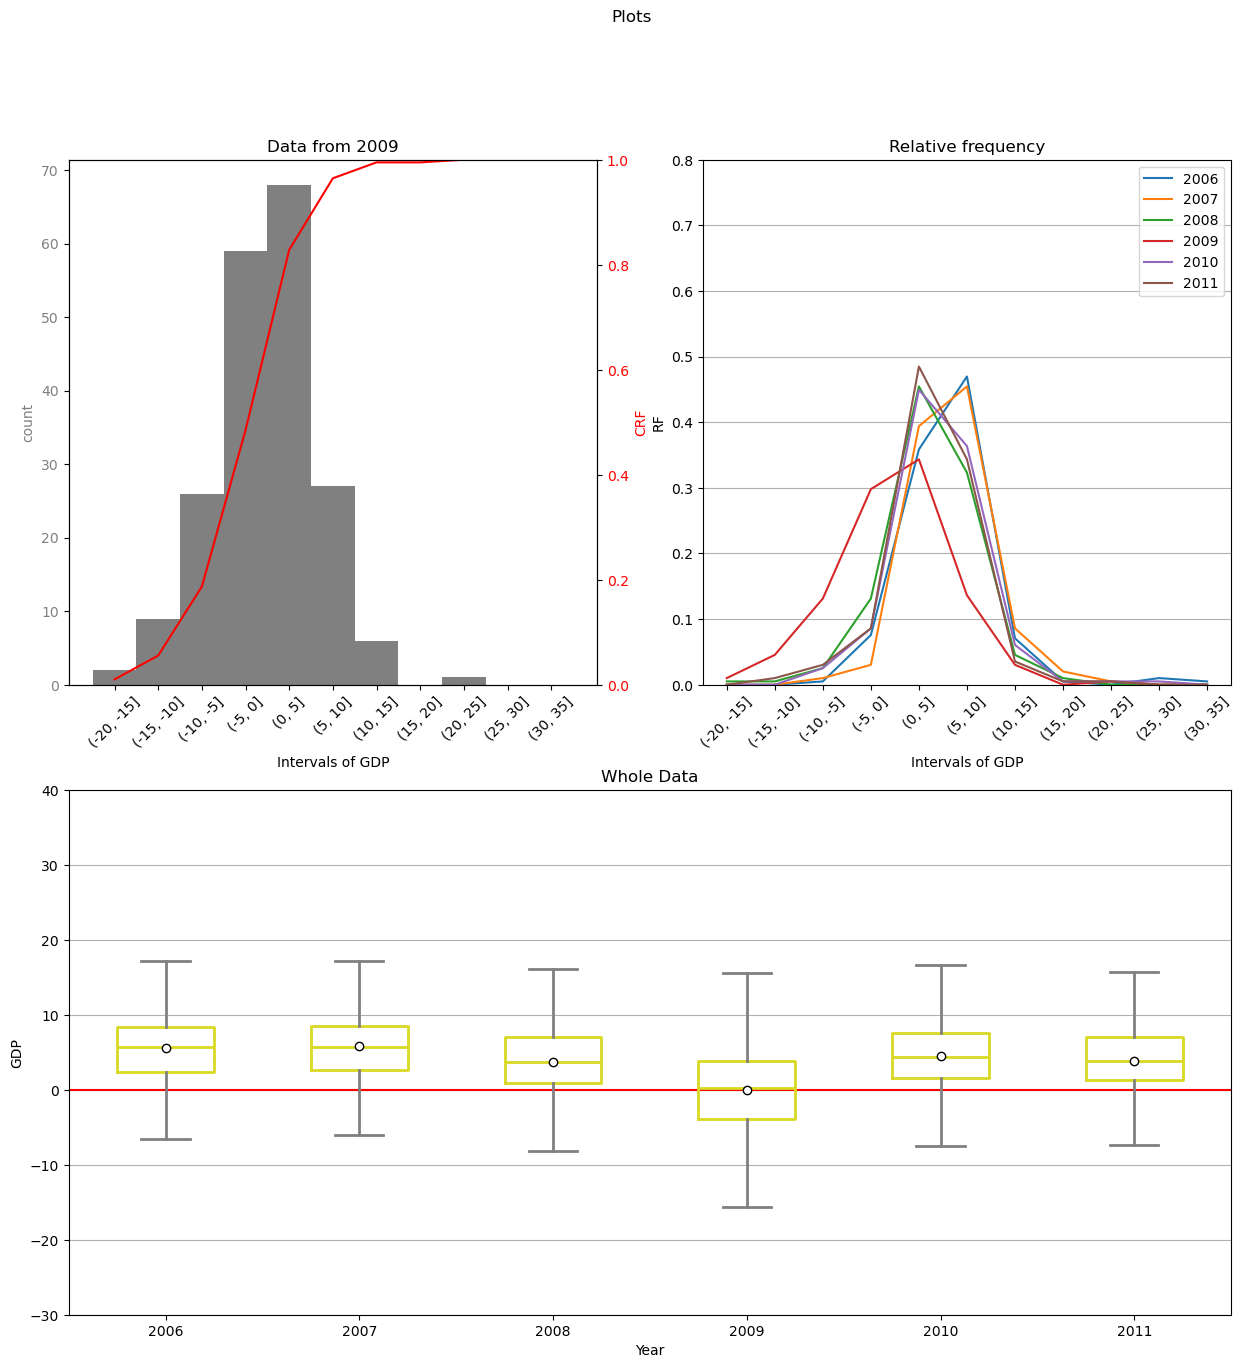

In [13]:
# YOUR CODE HERE
# wykres pudełkowy
plt.figure(figsize=(15,15))
plt.suptitle("Plots")
ax1 = plt.subplot(2,2,(3,4))

list_of_dict = []
for year in descriptive_parameters_2.columns:
    data = descriptive_parameters_2[year]
    RQ = data["Q3"] - data["Q1"]
    whislo = data["Q1"] - 1.5*RQ
    whishi = data["Q3"] + 1.5*RQ
    dict = {"med":data["Q2"],"q1":data["Q1"],"q3":data["Q3"],"whislo":whislo,"whishi":whishi,'mean':data["mean"]}
    list_of_dict.append(dict)
    
ax1.axhline(y=0, color="red")
ax1.bxp(bxpstats=list_of_dict,showfliers=False,positions=[*range(2006,2012)],showmeans=True,
        boxprops={"color":"#d9d923","linewidth":2},
        meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black"},
        whiskerprops={"color":"gray","linewidth":2},
        medianprops={"color":"#d9d923","linewidth":2},
        capprops={"color":"gray","linewidth":2})
ax1.set_ylim([-30,40])
ax1.yaxis.grid(True)
ax1.set_title('Whole Data')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP")

#histogram i łamana częstość skumulowana
year_2009 = recession_table_1['2009']
ax2 = plt.subplot(221)
xlabels = [str(x) for x in year_2009.index.values]
ax2.bar(xlabels,year_2009,width=1,color="gray")
ax2.set_title("Data from 2009")
ax2.set_xlabel("Intervals of GDP")
ax2.set_ylabel("count",color="gray")
ax2.tick_params(axis='y', labelcolor="gray")
plt.xticks(rotation=45)

ax4 = ax2.twinx()
cdf = year_2009.cumsum()/year_2009.sum()
ax4.plot(xlabels,cdf,color='red')
ax4.set_ylim([0,1])
ax4.set_ylabel("CRF",color="red")
ax4.tick_params(axis='y', labelcolor="red")

#diagramy częstości
ax3 = plt.subplot(222)
ax3.set_title("Relative frequency")
rf = recession_table_1/recession_table_1.sum()
ax3.plot(xlabels,rf)
ax3.set_ylim([0,0.8])
plt.xticks(rotation=45)
ax3.set_xlabel("Intervals of GDP")
ax3.set_ylabel("RF")
ax3.yaxis.grid(True)
ax3.legend(["2006","2007","2008","2009","2010","2011"])

plt.savefig("3plots.png")